<a href="https://colab.research.google.com/github/alencar-heitor/Colab-Notebook/blob/main/FaturaBLK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [455]:
import pandas as pd
import numpy as np

# Replace 'your_excel_file.xlsx' with the path to your Excel file
df = pd.read_excel('/content/20250831_Vendas_BR_Mercado_Libre_y_Mercado_Shops_2025-08-31_17-08hs_67752658.xlsx', header=5)

# Display the first 5 rows of the DataFrame
#display(df.head())

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [456]:
# Create a new column 'recordID' at the beginning of the DataFrame
df.insert(0, 'recordID', range(len(df)))

# Display the first few rows to see the new column
#display(df.head())

In [457]:
# Create a new empty column 'PackID' after the 'recordID' column
df.insert(1, 'PackID', None)

# Display the first few rows to see the new column
#display(df.head())

In [458]:
# Replace empty strings and whitespace with NaN in the 'Comprador' column
df['Comprador'] = df['Comprador'].replace(r'^\s*$', np.nan, regex=True)

# Iterate through each row and copy the value from 'N.º de venda' to 'PackID'
for index, row in df.iterrows():
    if pd.notna(row['Comprador']) and row['Comprador'] != '':
        df.loc[index, 'PackID'] = row['N.º de venda']

# Display the first few rows to see the changes in the 'PackID' column
display(df[['recordID', 'PackID', 'N.º de venda', 'Comprador']].head())

,recordID,PackID,N.º de venda,Comprador
0,0,2000008875116413,2000008875116413,Tres fios ltda
1,1,2000008874695477,2000008874695477,Giovana Carla Borges
2,2,2000008874655187,2000008874655187,William Xavier Gomes
3,3,None,2000012685653016,NaN
4,4,None,2000012685653018,NaN


In [459]:
# Fill empty or blank cells in the 'Comprador' column with the previous value
df['Comprador'] = df['Comprador'].ffill()

# Display the first few rows of the 'Comprador' column to check the changes (optional)
#display(df[['recordID', 'PackID', 'N.º de venda', 'Data da venda','Comprador']].head())

In [460]:
# Iterate through the DataFrame to fill empty 'PackID' values based on conditions
for index, row in df.iterrows():
    if pd.isna(row['PackID']):
        # Check if it's not the first row to avoid index errors
        if index > 0:
            previous_row = df.iloc[index - 1]
            # Check if 'Data da venda' and 'Comprador' match the previous row
            if row['Data da venda'] == previous_row['Data da venda'] and row['Comprador'] == previous_row['Comprador']:
                df.loc[index, 'PackID'] = previous_row['PackID']

# Display the first few rows to see the changes in the 'PackID' column
#display(df[['recordID', 'PackID', 'Data da venda', 'Comprador']].head())

In [461]:
# Find the index of the 'PackID' column
pack_id_index = df.columns.get_loc('PackID')

# Insert a new empty column 'SKU_std' after the 'PackID' column
df.insert(pack_id_index + 1, 'SKU_std', None)

# Display the first few rows to see the new column
#display(df[['recordID', 'PackID', 'SKU_std']].head())

In [462]:
# Define the mapping of SKU values to standardized SKU values
sku_mapping = {
    'disjuntorbi40a': 'Disjuntor',
    'AirFrier220V': 'AirFryer',
    'disjuntorbi32a': 'Disjuntor',
    'disjuntorbi50a': 'Disjuntor',
    'disjuntor25a': 'Disjuntor',
    'Mixer127v': 'Mixer',
    'Exaustor100mm': 'Exaustor',
    'disjuntorbi16a': 'Disjuntor',
    'disjuntorbi10a': 'Disjuntor',
    'disjuntorbi63a': 'Disjuntor',
    'Mixer220v': 'Mixer',
    'disjuntorbi20a': 'Disjuntor',
    'Bateria12v': 'Bateria',
    'AirFryer127v': 'AirFryer',
    'comedouro Vinho Transp.': 'Comedouro',
    'repelente56und': 'Repelente',
    'FILIALSPCOMEDOURO01': 'Comedouro',
    'comedouro Champ. Verde': 'Comedouro',
    'disjuntormono10a': 'Disjuntor',
    'disjuntorbi6a': 'Disjuntor',
    'comedouro Vinho Verde': 'Comedouro',
    'disjuntormono16a': 'Disjuntor',
    'disjuntormono20a': 'Disjuntor',
    'disjuntormono32a': 'Disjuntor',
    'Smirnoff Transparente': 'Comedouro',
    'disjuntormono25a': 'Disjuntor',
    'disjuntormono6a': 'Disjuntor',
    'repelente28und': 'Repelente',
    'disjuntormono50a': 'Disjuntor',
    'disjuntormono40a': 'Disjuntor'
}

# Apply the mapping to the 'SKU' column and store in 'SKU_std'
df['SKU_std'] = df['SKU'].replace(sku_mapping)

# Replace empty strings and whitespace with NaN in the 'Comprador' column
df['SKU_std'] = df['SKU_std'].replace(r'^\s*$', np.nan, regex=True)

# Display the first few rows of the 'SKU' and 'SKU_std' columns to check the changes
display(df[['recordID', 'SKU', 'SKU_std']].head())

,recordID,SKU,SKU_std
0,0,disjuntorbi40a,Disjuntor
1,1,AirFrier220V,AirFryer
2,2,,NaN
3,3,disjuntorbi32a,Disjuntor
4,4,disjuntorbi50a,Disjuntor


In [463]:
# Fill empty 'SKU_std' values within each PackID group using backward fill
df['SKU_std'] = df.groupby('PackID')['SKU_std'].bfill()

# Display the first few rows of the relevant columns to check the changes
display(df[['recordID', 'PackID', 'SKU', 'SKU_std']].head())

,recordID,PackID,SKU,SKU_std
0,0,2000008875116413,disjuntorbi40a,Disjuntor
1,1,2000008874695477,AirFrier220V,AirFryer
2,2,2000008874655187,,Disjuntor
3,3,2000008874655187,disjuntorbi32a,Disjuntor
4,4,2000008874655187,disjuntorbi50a,Disjuntor


In [464]:
# Replace empty strings and whitespace with NaN in the 'Comprador' column
df['Forma de entrega'] = df['Forma de entrega'].replace(r'^\s*$', np.nan, regex=True)

# Display the first few rows of the relevant columns to check the changes
display(df[['recordID', 'PackID', 'SKU_std', 'Forma de entrega']].head())

,recordID,PackID,SKU_std,Forma de entrega
0,0,2000008875116413,Disjuntor,Mercado Envios Full
1,1,2000008874695477,AirFryer,Mercado Envios Full
2,2,2000008874655187,Disjuntor,Mercado Envios Flex
3,3,2000008874655187,Disjuntor,NaN
4,4,2000008874655187,Disjuntor,NaN


In [465]:
# Iterate through the DataFrame to fill empty 'Forma de entrega' values based on conditions
for index, row in df.iterrows():
    if pd.isna(row['Forma de entrega']):
        # Check if it's not the first row to avoid index errors
        if index > 0:
            previous_row = df.iloc[index - 1]
            # Check if 'PackID' matches the previous row
            if row['PackID'] == previous_row['PackID']:
                df.loc[index, 'Forma de entrega'] = previous_row['Forma de entrega']

# Display the first few rows to see the changes in the 'Forma de entrega' column
display(df[['recordID', 'PackID', 'SKU_std', 'Forma de entrega']].head())

,recordID,PackID,SKU_std,Forma de entrega
0,0,2000008875116413,Disjuntor,Mercado Envios Full
1,1,2000008874695477,AirFryer,Mercado Envios Full
2,2,2000008874655187,Disjuntor,Mercado Envios Flex
3,3,2000008874655187,Disjuntor,Mercado Envios Flex
4,4,2000008874655187,Disjuntor,Mercado Envios Flex


In [466]:
# Create a mapping of Portuguese month names to numerical representation
month_mapping = {
    'janeiro': '01',
    'fevereiro': '02',
    'março': '03',
    'abril': '04',
    'maio': '05',
    'junho': '06',
    'julho': '07',
    'agosto': '08',
    'setembro': '09',
    'outubro': '10',
    'novembro': '11',
    'dezembro': '12'
}

# Create the 'DT_Venda' column by copying the 'Data da venda' column
df['DT_Venda'] = df['Data da venda'].copy()

# Replace the Portuguese month names with numerical representation in 'DT_Venda' column
for pt_month, num_month in month_mapping.items():
    df['DT_Venda'] = df['DT_Venda'].str.replace(f'de {pt_month} de', f'{num_month}/', regex=False)

# Now convert the modified 'DT_Venda' column to datetime
# The format string will be like '15 08/ 2025 22:33 hs.' after replacement
df['DT_Venda'] = pd.to_datetime(df['DT_Venda'], format='%d %m/ %Y %H:%M hs.', errors='coerce')

# Display the original 'Data da venda' and the new 'DT_Venda' columns to verify
display(df[['Data da venda', 'DT_Venda']].head())

,Data da venda,DT_Venda
0,15 de agosto de 2025 23:31 hs.,2025-08-15 23:31:00
1,15 de agosto de 2025 22:38 hs.,2025-08-15 22:38:00
2,15 de agosto de 2025 22:33 hs.,2025-08-15 22:33:00
3,15 de agosto de 2025 22:33 hs.,2025-08-15 22:33:00
4,15 de agosto de 2025 22:33 hs.,2025-08-15 22:33:00


In [467]:
import numpy as np

# Replace values in 'Estado' column containing 'Pacote de' with NaN
df['Estado'] = df['Estado'].replace(r'.*Pacote de.*', np.nan, regex=True)

# Display the first few rows of the 'Estado' column to check the changes (optional)
display(df[['recordID', 'Estado']].head())

,recordID,Estado
0,0,Entregue
1,1,Entregue
2,2,NaN
3,3,Mediação finalizada com reembolso para o compr...
4,4,Mediação finalizada com reembolso para o compr...


In [468]:
# Fill empty 'SKU_std' values within each PackID group using backward fill
df['Estado'] = df.groupby('PackID')['Estado'].bfill()

display(df[['recordID', 'Estado']].head())

,recordID,Estado
0,0,Entregue
1,1,Entregue
2,2,Mediação finalizada com reembolso para o compr...
3,3,Mediação finalizada com reembolso para o compr...
4,4,Mediação finalizada com reembolso para o compr...


In [469]:
# Mapping of Estado values to 'Faturar'
Estado_mapping = {
    'Entregue': 'Faturar',
    'Mediação finalizada com reembolso para o comprador': 'N_Faturar',
    'Cancelada pelo comprador': 'N_Faturar',
    'Devolução para revisar até quarta-feira': 'N_Faturar',
    'Em devolução': 'N_Faturar',
    np.nan: 'Faturar',
    'Mediação finalizada. Te demos o dinheiro.': 'Faturar',
    'Devolução finalizada com reembolso para o comprador': 'N_Faturar',
    'Devolução em revisão': 'N_Faturar',
    'Pacote cancelado pelo Mercado Livre': 'N_Faturar',
    'Devolução a caminho': 'N_Faturar',
    'Devolução finalizada. Descartamos o produto': 'N_Faturar',
    'A caminho': 'Faturar',
    'O envio está atrasado, mas o dinheiro já está disponível para você': 'Faturar',
    'Venda não entregue. Liberamos o seu dinheiro.': 'Faturar',
    'Devolução com data atualizada': 'N_Faturar',
    'Devolução em preparação': 'N_Faturar',
    'Reclamação encerrada com reembolso para o comprador': 'N_Faturar',
    'Cancelada': 'N_Faturar',
    'Devolução revisada. Solicite a retirada do produto': 'N_Faturar',
    'Devolução finalizada. Colocamos o produto à venda novamente': 'N_Faturar',
    'Venda entregue': 'Faturar',
    'Reclamação encerrada': 'Faturar',
    'Devolução finalizada. Confira os resultados.': 'N_Faturar',
    'Devolução não entregue': 'Faturar'
}

In [470]:
# Apply the mapping to the 'Estado' column to get the mapped status
mapped_estado = df['Estado'].map(Estado_mapping)

# Create a boolean mask for rows where the mapped status is 'Faturar'
faturar_mask = (mapped_estado == 'Faturar')

# Filter the original DataFrame to keep only rows where the mapped status is 'Faturar'
df_faturar = df[faturar_mask].copy()

# Filter the original DataFrame to get rows where the mapped status is NOT 'Faturar'
df_nfaturar = df[~faturar_mask].copy()

# Rename df_faturar back to df as requested
df = df_faturar

# Display the first few rows of both DataFrames to verify (optional)
print("DataFrame 'df' (Faturar):")
display(df.head())

print("\nDataFrame 'df_nfaturar' (Não Faturar):")
display(df_nfaturar.head())

DataFrame 'df' (Faturar):


,recordID,PackID,SKU_std,N.º de venda,Data da venda,Estado,Descrição do status,Pacote de diversos produtos,Pertence a um kit,Unidades,...,Data de revisão,Dinheiro liberado,Resultado,Destino,Motivo do resultado,Unidades.2,Reclamação aberta,Reclamação encerrada,Em mediação,DT_Venda
0,0,2000008875116413,Disjuntor,2000008875116413,15 de agosto de 2025 23:31 hs.,Entregue,Chegou em 18 de agosto,Sim,Não,4.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 23:31:00
1,1,2000008874695477,AirFryer,2000008874695477,15 de agosto de 2025 22:38 hs.,Entregue,Chegou em 18 de agosto,Sim,Não,1.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 22:38:00
6,6,2000008874483331,Mixer,2000008874483331,15 de agosto de 2025 22:15 hs.,Entregue,Chegou em 18 de agosto,Sim,Não,1.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 22:15:00
7,7,2000012684581654,Exaustor,2000012684581654,15 de agosto de 2025 20:48 hs.,Entregue,Chegou em 16 de agosto,Não,Não,1.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 20:48:00
8,8,2000008873568165,Mixer,2000008873568165,15 de agosto de 2025 20:41 hs.,Entregue,Chegou em 18 de agosto,Sim,Não,1.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 20:41:00



DataFrame 'df_nfaturar' (Não Faturar):


,recordID,PackID,SKU_std,N.º de venda,Data da venda,Estado,Descrição do status,Pacote de diversos produtos,Pertence a um kit,Unidades,...,Data de revisão,Dinheiro liberado,Resultado,Destino,Motivo do resultado,Unidades.2,Reclamação aberta,Reclamação encerrada,Em mediação,DT_Venda
2,2,2000008874655187,Disjuntor,2000008874655187,15 de agosto de 2025 22:33 hs.,Mediação finalizada com reembolso para o compr...,,,,NaN,...,,,,,,NaN,,NaN,,2025-08-15 22:33:00
3,3,2000008874655187,Disjuntor,2000012685653016,15 de agosto de 2025 22:33 hs.,Mediação finalizada com reembolso para o compr...,O comprador não poderá reiniciar uma reclamaçã...,Sim,Não,2.0,...,,,,,,1.0,Não,1.0,Não,2025-08-15 22:33:00
4,4,2000008874655187,Disjuntor,2000012685653018,15 de agosto de 2025 22:33 hs.,Mediação finalizada com reembolso para o compr...,O comprador não poderá reiniciar uma reclamaçã...,Sim,Não,1.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 22:33:00
5,5,2000008874655187,Disjuntor,2000012685653020,15 de agosto de 2025 22:33 hs.,Mediação finalizada com reembolso para o compr...,O comprador não poderá reiniciar uma reclamaçã...,Sim,Não,4.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 22:33:00
24,24,2000012682941766,Disjuntor,2000012682941766,15 de agosto de 2025 18:16 hs.,Cancelada pelo comprador,Cancelou porque não podia esperar o produto.,Não,Não,1.0,...,,,,,,NaN,Não,NaN,Não,2025-08-15 18:16:00


In [471]:
# Create a new column 'DT' with only the date part of 'DT_Venda'
df['DT'] = df['DT_Venda'].dt.date

# Display the first few rows of the relevant columns to verify
display(df[['DT_Venda', 'DT']].head())

,DT_Venda,DT
0,2025-08-15 23:31:00,2025-08-15
1,2025-08-15 22:38:00,2025-08-15
6,2025-08-15 22:15:00,2025-08-15
7,2025-08-15 20:48:00,2025-08-15
8,2025-08-15 20:41:00,2025-08-15


In [472]:
# Create a new DataFrame with the specified columns
df_fatura = df[['Forma de entrega', 'SKU_std', 'DT', 'PackID']].copy()

# Display the first few rows of the new DataFrame to verify
display(df_fatura.head())

,Forma de entrega,SKU_std,DT,PackID
0,Mercado Envios Full,Disjuntor,2025-08-15,2000008875116413
1,Mercado Envios Full,AirFryer,2025-08-15,2000008874695477
6,Mercado Envios Full,Mixer,2025-08-15,2000008874483331
7,Mercado Envios Full,Exaustor,2025-08-15,2000012684581654
8,Mercado Envios Full,Mixer,2025-08-15,2000008873568165


# Task
Group the DataFrame `df_fatura` by 'Forma de entrega' and 'SKU_std', count the unique 'PackID's in each group, and create a 'Período' column showing the date range from the minimum to maximum 'DT' in the format "YYYY-MM-DD até YYYY-MM-DD".

## Group and aggregate data

### Subtask:
Group `df_fatura` by 'Forma de entrega' and 'SKU_std'. For each group, count the number of unique 'PackID's and find the minimum and maximum dates from the 'DT' column.


**Reasoning**:
Group the DataFrame by 'Forma de entrega' and 'SKU_std' and aggregate the 'PackID' and 'DT' columns as requested.



In [473]:
df_grouped = df_fatura.groupby(['Forma de entrega', 'SKU_std']).agg(
    {'PackID': 'nunique',
     'DT': ['min', 'max']}
).reset_index()

# Rename the columns for clarity
df_grouped.columns = ['Forma de entrega', 'SKU_std', 'Quantidade de Packs', 'Data Inicial', 'Data Final']

# Display the first few rows of the grouped DataFrame
display(df_grouped.head())

,Forma de entrega,SKU_std,Quantidade de Packs,Data Inicial,Data Final
0,Mercado Envios Flex,AirFryer,8,2025-06-17,2025-08-15
1,Mercado Envios Flex,Bateria,2,2025-08-11,2025-08-13
2,Mercado Envios Flex,Comedouro,2,2025-06-26,2025-08-11
3,Mercado Envios Flex,Disjuntor,48,2025-06-16,2025-08-15
4,Mercado Envios Flex,Exaustor,8,2025-06-26,2025-08-15


## Format the date range

### Subtask:
Create a new column 'Período' by formatting the minimum and maximum dates into a string like "YYYY-MM-DD até YYYY-MM-DD".


**Reasoning**:
Create the 'Período' column by formatting the 'Data Inicial' and 'Data Final' columns into the specified string format and display the result.



In [474]:
# Create the 'Período' column by formatting the dates
df_grouped['Período'] = df_grouped['Data Inicial'].astype(str) + ' até ' + df_grouped['Data Final'].astype(str)

# Display the first few rows of df_grouped including the new 'Período' column
display(df_grouped[['Forma de entrega', 'SKU_std', 'Quantidade de Packs', 'Período']].head())

,Forma de entrega,SKU_std,Quantidade de Packs,Período
0,Mercado Envios Flex,AirFryer,8,2025-06-17 até 2025-08-15
1,Mercado Envios Flex,Bateria,2,2025-08-11 até 2025-08-13
2,Mercado Envios Flex,Comedouro,2,2025-06-26 até 2025-08-11
3,Mercado Envios Flex,Disjuntor,48,2025-06-16 até 2025-08-15
4,Mercado Envios Flex,Exaustor,8,2025-06-26 até 2025-08-15


## Display the aggregated data

### Subtask:
Display the resulting DataFrame with the counts and the 'Período' column.


**Reasoning**:
Display the entire df_grouped DataFrame to show the aggregated data including the counts and the 'Período' column.



In [475]:
display(df_grouped)
print(len(df_grouped))

,Forma de entrega,SKU_std,Quantidade de Packs,Data Inicial,Data Final,Período
0,Mercado Envios Flex,AirFryer,8,2025-06-17,2025-08-15,2025-06-17 até 2025-08-15
1,Mercado Envios Flex,Bateria,2,2025-08-11,2025-08-13,2025-08-11 até 2025-08-13
2,Mercado Envios Flex,Comedouro,2,2025-06-26,2025-08-11,2025-06-26 até 2025-08-11
3,Mercado Envios Flex,Disjuntor,48,2025-06-16,2025-08-15,2025-06-16 até 2025-08-15
4,Mercado Envios Flex,Exaustor,8,2025-06-26,2025-08-15,2025-06-26 até 2025-08-15
5,Mercado Envios Flex,Mixer,2,2025-08-15,2025-08-15,2025-08-15 até 2025-08-15
6,Mercado Envios Flex,Repelente,1,2025-08-14,2025-08-14,2025-08-14 até 2025-08-14
7,Mercado Envios Full,AirFryer,127,2025-06-16,2025-08-15,2025-06-16 até 2025-08-15
8,Mercado Envios Full,Bateria,140,2025-06-16,2025-08-15,2025-06-16 até 2025-08-15
9,Mercado Envios Full,Comedouro,92,2025-06-16,2025-08-14,2025-06-16 até 2025-08-14


14


## Summary:

### Data Analysis Key Findings

*   The data was successfully grouped by 'Forma de entrega' and 'SKU\_std'.
*   The number of unique 'PackID's was counted for each group and stored in the 'Quantidade de Packs' column.
*   The minimum and maximum dates for each group were identified from the 'DT' column and stored in 'Data Inicial' and 'Data Final' respectively.
*   A 'Período' column was created, displaying the date range for each group in the format "YYYY-MM-DD até YYYY-MM-DD".

### Insights or Next Steps

*   This grouped data provides a clear overview of the volume of unique packs for different delivery methods and SKUs over specific time periods.
*   This aggregated data could be used for further analysis, such as identifying trends in pack volumes, comparing delivery methods, or analyzing SKU performance.


In [476]:
# Create a dictionary mapping each unique SKU_std value to 0
vlUnit = {
    'Disjuntor': 1.1,
    'AirFryer': 0.4,
    'Mixer': 0.4,
    'Exaustor': 0.4,
    'Bateria': 0.4,
    'Comedouro': 1.1,
    'Repelente': 1.1,
    'Devolução': 1.1,
    'Entrega': 11.99
}

# Display the dictionary (optional)
display(vlUnit)

{'Disjuntor': 1.1,
 'AirFryer': 0.4,
 'Mixer': 0.4,
 'Exaustor': 0.4,
 'Bateria': 0.4,
 'Comedouro': 1.1,
 'Repelente': 1.1,
 'Devolução': 1.1,
 'Entrega': 14.9}

In [477]:
# Drop the 'Data Inicial' and 'Data Final' columns from df_grouped
df_grouped = df_grouped.drop(columns=['Data Inicial', 'Data Final'])

# Define the desired column order with 'Quantidade de Packs' at the end
new_column_order = ['Forma de entrega', 'SKU_std', 'Período', 'Quantidade de Packs']

# Reindex the DataFrame with the new column order
df_grouped = df_grouped[new_column_order]

# Display the first few rows of the modified df_grouped (optional)
display(df_grouped.head())

,Forma de entrega,SKU_std,Período,Quantidade de Packs
0,Mercado Envios Flex,AirFryer,2025-06-17 até 2025-08-15,8
1,Mercado Envios Flex,Bateria,2025-08-11 até 2025-08-13,2
2,Mercado Envios Flex,Comedouro,2025-06-26 até 2025-08-11,2
3,Mercado Envios Flex,Disjuntor,2025-06-16 até 2025-08-15,48
4,Mercado Envios Flex,Exaustor,2025-06-26 até 2025-08-15,8


In [478]:
# Sort the DataFrame by 'Forma de entrega' and 'SKU_std'
df_grouped = df_grouped.sort_values(by=['Forma de entrega', 'SKU_std']).reset_index(drop=True)

# Display the first few rows of the sorted DataFrame (optional)
display(df_grouped)

,Forma de entrega,SKU_std,Período,Quantidade de Packs
0,Mercado Envios Flex,AirFryer,2025-06-17 até 2025-08-15,8
1,Mercado Envios Flex,Bateria,2025-08-11 até 2025-08-13,2
2,Mercado Envios Flex,Comedouro,2025-06-26 até 2025-08-11,2
3,Mercado Envios Flex,Disjuntor,2025-06-16 até 2025-08-15,48
4,Mercado Envios Flex,Exaustor,2025-06-26 até 2025-08-15,8
5,Mercado Envios Flex,Mixer,2025-08-15 até 2025-08-15,2
6,Mercado Envios Flex,Repelente,2025-08-14 até 2025-08-14,1
7,Mercado Envios Full,AirFryer,2025-06-16 até 2025-08-15,127
8,Mercado Envios Full,Bateria,2025-06-16 até 2025-08-15,140
9,Mercado Envios Full,Comedouro,2025-06-16 até 2025-08-14,92


In [479]:
# Create a boolean mask for the row to exclude
exclude_mask = (df_grouped['SKU_std'] == 'Repelente') & (df_grouped['Forma de entrega'] == 'Mercado Envios Full')

# Filter the DataFrame to keep all rows except the one matching the exclude mask
filtered_df = df_grouped[~exclude_mask].copy()

# Display the filtered DataFrame
display(filtered_df)
print(len(filtered_df))

,Forma de entrega,SKU_std,Período,Quantidade de Packs
0,Mercado Envios Flex,AirFryer,2025-06-17 até 2025-08-15,8
1,Mercado Envios Flex,Bateria,2025-08-11 até 2025-08-13,2
2,Mercado Envios Flex,Comedouro,2025-06-26 até 2025-08-11,2
3,Mercado Envios Flex,Disjuntor,2025-06-16 até 2025-08-15,48
4,Mercado Envios Flex,Exaustor,2025-06-26 até 2025-08-15,8
5,Mercado Envios Flex,Mixer,2025-08-15 até 2025-08-15,2
6,Mercado Envios Flex,Repelente,2025-08-14 até 2025-08-14,1
7,Mercado Envios Full,AirFryer,2025-06-16 até 2025-08-15,127
8,Mercado Envios Full,Bateria,2025-06-16 até 2025-08-15,140
9,Mercado Envios Full,Comedouro,2025-06-16 até 2025-08-14,92


13


In [480]:
# Define the data for the new row
new_row_data = [
    {
    'Forma de entrega': 'Devoluções',
    'SKU_std': 'Devolução',
    'Período': None,  # Or np.nan if preferred for consistency
    'Quantidade de Packs': 89
},
    {
    'Forma de entrega': 'Entregas',
    'SKU_std': 'Entrega',
    'Período': None,  # Or np.nan if preferred for consistency
    'Quantidade de Packs': 1
}
]

In [481]:
# Assuming new_row_data is a list of dictionaries defined in a previous cell

# Create a DataFrame from the list of new row data
new_rows_df = pd.DataFrame(new_row_data)

# Ensure the new rows DataFrame has all columns present in filtered_df, filling missing with None
for col in filtered_df.columns:
    if col not in new_rows_df.columns:
        new_rows_df[col] = None

# Reindex the new_rows_df to match the column order of filtered_df
new_rows_df = new_rows_df.reindex(columns=filtered_df.columns)

# Append the new rows DataFrame to the filtered_df DataFrame
# Use ignore_index=True to reset the index of the resulting DataFrame
filtered_df = pd.concat([filtered_df, new_rows_df], ignore_index=True)

# Display the updated DataFrame (optional)
display(filtered_df)

,Forma de entrega,SKU_std,Período,Quantidade de Packs
0,Mercado Envios Flex,AirFryer,2025-06-17 até 2025-08-15,8
1,Mercado Envios Flex,Bateria,2025-08-11 até 2025-08-13,2
2,Mercado Envios Flex,Comedouro,2025-06-26 até 2025-08-11,2
3,Mercado Envios Flex,Disjuntor,2025-06-16 até 2025-08-15,48
4,Mercado Envios Flex,Exaustor,2025-06-26 até 2025-08-15,8
5,Mercado Envios Flex,Mixer,2025-08-15 até 2025-08-15,2
6,Mercado Envios Flex,Repelente,2025-08-14 até 2025-08-14,1
7,Mercado Envios Full,AirFryer,2025-06-16 até 2025-08-15,127
8,Mercado Envios Full,Bateria,2025-06-16 até 2025-08-15,140
9,Mercado Envios Full,Comedouro,2025-06-16 até 2025-08-14,92


In [482]:
# Create a new column 'VL Unit' by mapping 'SKU_std' values using the vlUnit dictionary
filtered_df['VL Unit'] = filtered_df['SKU_std'].map(vlUnit)

# Create a new column 'VL Total' by multiplying 'VL Unit' and 'Quantidade de Packs'
filtered_df['VL Total'] = filtered_df['VL Unit'] * filtered_df['Quantidade de Packs']

# Display the first few rows of the relevant columns to verify
display(filtered_df)

,Forma de entrega,SKU_std,Período,Quantidade de Packs,VL Unit,VL Total
0,Mercado Envios Flex,AirFryer,2025-06-17 até 2025-08-15,8,0.4,3.2
1,Mercado Envios Flex,Bateria,2025-08-11 até 2025-08-13,2,0.4,0.8
2,Mercado Envios Flex,Comedouro,2025-06-26 até 2025-08-11,2,1.1,2.2
3,Mercado Envios Flex,Disjuntor,2025-06-16 até 2025-08-15,48,1.1,52.8
4,Mercado Envios Flex,Exaustor,2025-06-26 até 2025-08-15,8,0.4,3.2
5,Mercado Envios Flex,Mixer,2025-08-15 até 2025-08-15,2,0.4,0.8
6,Mercado Envios Flex,Repelente,2025-08-14 até 2025-08-14,1,1.1,1.1
7,Mercado Envios Full,AirFryer,2025-06-16 até 2025-08-15,127,0.4,50.8
8,Mercado Envios Full,Bateria,2025-06-16 até 2025-08-15,140,0.4,56.0
9,Mercado Envios Full,Comedouro,2025-06-16 até 2025-08-14,92,1.1,101.2


In [483]:
# Calculate the subtotal of the 'VL Total' column
subtotal_vl_total = filtered_df['VL Total'].sum()

# Create a dictionary for the subtotal row
subtotal_row_data = {
    'Forma de entrega': 'Subtotal',  # Label for the subtotal row
    'Quantidade de Packs': filtered_df['Quantidade de Packs'].sum(), # Also add subtotal for Quantity
    'VL Total': subtotal_vl_total
    # You can add labels or None for other columns as needed
}

# Create a Series from the subtotal row data
subtotal_row = pd.Series(subtotal_row_data)

# Ensure the subtotal row has all columns present in filtered_df, filling missing with None
for col in filtered_df.columns:
    if col not in subtotal_row:
        subtotal_row[col] = None

# Reindex the subtotal_row Series to match the column order of filtered_df
subtotal_row = subtotal_row.reindex(filtered_df.columns)


# Append the subtotal row to the filtered_df DataFrame
# Use ignore_index=True to reset the index of the resulting DataFrame
filtered_df = pd.concat([filtered_df, subtotal_row.to_frame().T], ignore_index=True)

# Display the updated DataFrame (optional)
display(filtered_df)

/tmp/ipython-input-1877530011.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filtered_df = pd.concat([filtered_df, subtotal_row.to_frame().T], ignore_index=True)


,Forma de entrega,SKU_std,Período,Quantidade de Packs,VL Unit,VL Total
0,Mercado Envios Flex,AirFryer,2025-06-17 até 2025-08-15,8,0.4,3.2
1,Mercado Envios Flex,Bateria,2025-08-11 até 2025-08-13,2,0.4,0.8
2,Mercado Envios Flex,Comedouro,2025-06-26 até 2025-08-11,2,1.1,2.2
3,Mercado Envios Flex,Disjuntor,2025-06-16 até 2025-08-15,48,1.1,52.8
4,Mercado Envios Flex,Exaustor,2025-06-26 até 2025-08-15,8,0.4,3.2
5,Mercado Envios Flex,Mixer,2025-08-15 até 2025-08-15,2,0.4,0.8
6,Mercado Envios Flex,Repelente,2025-08-14 até 2025-08-14,1,1.1,1.1
7,Mercado Envios Full,AirFryer,2025-06-16 até 2025-08-15,127,0.4,50.8
8,Mercado Envios Full,Bateria,2025-06-16 até 2025-08-15,140,0.4,56.0
9,Mercado Envios Full,Comedouro,2025-06-16 até 2025-08-14,92,1.1,101.2


# Task
Generate a PDF document containing a table derived from the `filtered_df` DataFrame, centered on an A4 page, with the title "Fatura Período YYYY-MM-DD até YYYY-MM-DD", where the dates in the title represent the minimum and maximum dates found in the 'Período' column of the DataFrame.

## Prepare data for pdf

### Subtask:
Ensure `filtered_df` is in the final desired state and select/reorder columns if necessary for the PDF output.


**Reasoning**:
Examine the current state of `filtered_df` and reorder columns for the final PDF output as needed.



In [484]:
# Define the desired column order for the PDF output
final_column_order = ['Forma de entrega', 'SKU_std', 'Quantidade de Packs', 'VL Unit', 'VL Total', 'Período']

# Reindex the DataFrame with the final column order
filtered_df = filtered_df[final_column_order]

# Display the first few rows of the prepared DataFrame to verify the changes
display(filtered_df.head())

,Forma de entrega,SKU_std,Quantidade de Packs,VL Unit,VL Total,Período
0,Mercado Envios Flex,AirFryer,8,0.4,3.2,2025-06-17 até 2025-08-15
1,Mercado Envios Flex,Bateria,2,0.4,0.8,2025-08-11 até 2025-08-13
2,Mercado Envios Flex,Comedouro,2,1.1,2.2,2025-06-26 até 2025-08-11
3,Mercado Envios Flex,Disjuntor,48,1.1,52.8,2025-06-16 até 2025-08-15
4,Mercado Envios Flex,Exaustor,8,0.4,3.2,2025-06-26 até 2025-08-15


## Format table for pdf

### Subtask:
Format the DataFrame `filtered_df` as a table suitable for PDF output.


**Reasoning**:
Create a matplotlib table from the filtered_df DataFrame.



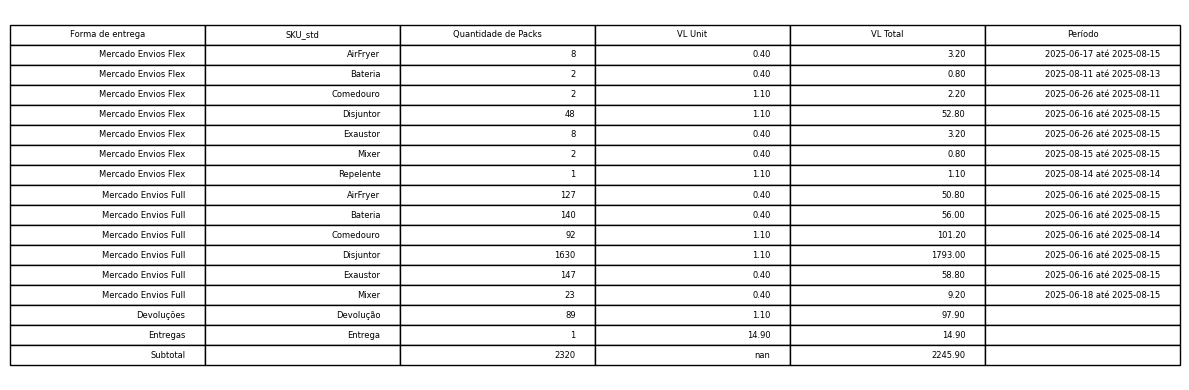

In [485]:
import matplotlib.pyplot as plt

# Format 'VL Unit' to one decimal place and 'VL Total' to two decimal places
# Ensure the columns exist before formatting
if 'VL Unit' in filtered_df.columns:
  filtered_df['VL Unit'] = filtered_df['VL Unit'].map('{:.2f}'.format)
if 'VL Total' in filtered_df.columns:
  filtered_df['VL Total'] = filtered_df['VL Total'].map('{:.2f}'.format)

# Create a matplotlib figure and axes
fig, ax = plt.subplots(figsize=(12, 4)) # Adjust figure size as needed

# Hide the axes
ax.axis('off')

# Create the table
table = ax.table(cellText=filtered_df.values, colLabels=filtered_df.columns, loc='center')

# Adjust layout to prevent labels overlapping
plt.tight_layout()

## Determine date range for title

### Subtask:
Extract the minimum and maximum dates from the 'Período' column (or 'DT' if available and preferred) to create the dynamic title.


**Reasoning**:
Convert 'Período' to string, filter out None/empty values, extract start and end dates, find min/max dates, and store them in `min_date` and `max_date`.



In [486]:
# Convert 'Período' column to string type
filtered_df['Período'] = filtered_df['Período'].astype(str)

# Filter out rows where 'Período' is None or empty
filtered_periods_df = filtered_df[filtered_df['Período'].str.contains(' até ', na=False)].copy()

# Extract start and end dates
start_dates = filtered_periods_df['Período'].str.split(' até ').str[0]
end_dates = filtered_periods_df['Período'].str.split(' até ').str[1]

# Convert extracted dates to datetime objects for comparison
start_dates = pd.to_datetime(start_dates, errors='coerce')
end_dates = pd.to_datetime(end_dates, errors='coerce')

# Find the overall minimum start date and maximum end date, ignoring NaT values
min_date = start_dates.min()
max_date = end_dates.max()

# Print the extracted dates to verify
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2025-06-16 00:00:00
Maximum Date: 2025-08-15 00:00:00


## Create title

### Subtask:
Generate the title string "Fatura Período YYYY-MM-DD até YYYY-MM-DD" using the determined date range.


**Reasoning**:
Create the title string using an f-string and the determined min_date and max_date variables, then print the result to verify.



In [487]:
pdf_title = f"Fatura Período {min_date.strftime('%Y-%m-%d')} até {max_date.strftime('%Y-%m-%d')}"

print(pdf_title)

Fatura Período 2025-06-16 até 2025-08-15


## Generate pdf

### Subtask:
Use a library (like `reportlab` or `fpdf`) to create a PDF document.


**Reasoning**:
Import the necessary classes from reportlab and create the PDF document template.



**Reasoning**:
The previous command failed because the `reportlab` library is not installed. Install the library to resolve the `ModuleNotFoundError`.



In [488]:
%pip install reportlab

**Reasoning**:
Now that `reportlab` is installed, retry importing the necessary classes and instantiating the `SimpleDocTemplate`.



In [489]:
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Spacer
from reportlab.lib.pagesizes import A4

# Create a list to hold the content of the PDF
elements = []

# Instantiate SimpleDocTemplate
doc = SimpleDocTemplate("fatura.pdf", pagesize=A4)

## Add title to pdf

### Subtask:
Add the generated title to the PDF document, ensuring it is placed correctly.


**Reasoning**:
Import necessary classes, define a style for the title, create a Paragraph object for the title, and add it and a Spacer to the elements list.



In [490]:
from reportlab.platypus import Paragraph, Spacer
from reportlab.lib.styles import ParagraphStyle

# Define a paragraph style for the title
title_style = ParagraphStyle(
    name='TitleStyle',
    parent=ParagraphStyle('Normal'),
    fontSize=16,
    leading=18,
    alignment=1,  # 0=Left, 1=Center, 2=Right
    spaceAfter=12,
)

# Create a Paragraph object for the pdf_title
title_paragraph = Paragraph(pdf_title, title_style)

# Append the title paragraph to the elements list
elements.append(title_paragraph)

# Add a Spacer after the title
elements.append(Spacer(1, 0.2 * A4[1])) # Adding 0.2 inches of vertical space

## Add table to pdf

### Subtask:
Add the formatted table to the PDF document, ensuring it is centered on the A4 page.


**Reasoning**:
Convert the filtered_df DataFrame to a list of lists including the header, create a Table object, define and apply a TableStyle for centering and borders, and append the table to the elements list.



In [491]:
from reportlab.lib import colors
from reportlab.lib.units import inch

# Get the data from the DataFrame including the header
data = [filtered_df.columns.tolist()] + filtered_df.values.tolist()

# Create a Table object
table = Table(data)

# Define a TableStyle for centering and borders
style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey), # Header background
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke), # Header text color
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'), # Center all content
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'), # Header font
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12), # Header padding
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige), # Data row background
    ('GRID', (0, 0), (-1, -1), 1, colors.black), # Add grid lines
    ('BOX', (0, 0), (-1, -1), 2, colors.black), # Add box border
])

# Apply the style to the table
table.setStyle(style)

# Append the styled table to the elements list
elements.append(table)

**Reasoning**:
Build the PDF document from the elements list.



In [492]:
# Build the PDF document
doc.build(elements)

## Save pdf

### Subtask:
Save the generated PDF to a file named 'fatura.pdf'.


## Summary:

### Data Analysis Key Findings

*   The minimum date found in the 'Período' column was 2025-06-16 and the maximum date was 2025-08-15.
*   A PDF document titled "Fatura Período 2025-06-16 até 2025-08-15" was successfully generated.
*   The PDF contains a table derived from the `filtered_df` DataFrame with columns 'Forma de entrega', 'SKU\_std', 'Quantidade de Packs', 'VL Unit', 'VL Total', and 'Período'.
*   The table in the PDF is formatted with a grey header, beige data rows, black grid lines, and a black box border.
*   Both the title and the table are centered on an A4 page in the generated PDF file 'fatura.pdf'.

### Insights or Next Steps

*   Consider adding dynamic column width adjustments to the table based on content to improve readability.
*   Explore adding page numbers or a footer to the PDF document for better navigation and professionalism.
